In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd

def get_train_acc(log_file):
    train_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('rain_acc \d+.\d+', line)
        if match:
            train_acc = match[0].split(' ')[1]
            train_acc_list.append(float(train_acc))
        
    return train_acc_list

def get_valid_acc(log_file):
    valid_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('alid_acc.? \d+.\d+', line)
        if match:
            valid_acc = match[0].split(' ')[1]
            valid_acc_list.append(float(valid_acc))
        
    return valid_acc_list

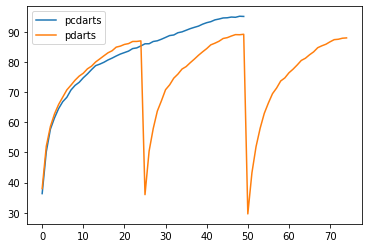

In [27]:
pcdarts_search = get_train_acc('./PC-DARTS/begin_unroll/log.txt')
pdarts_search = get_train_acc('./PDARTS/begin_unroll/log.txt')

plt.plot(pcdarts_search, label='pcdarts')
plt.plot(pdarts_search, label='pdarts')

plt.legend()

96.66

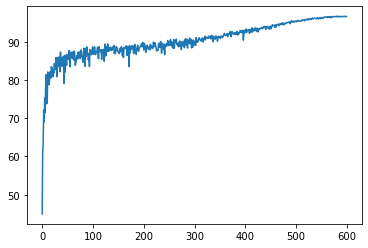

In [32]:
pdarts_train = get_valid_acc('./PDARTS/begin/log.txt')
plt.plot(pdarts_train, label='pdarts')
max(pdarts_train)

96.27

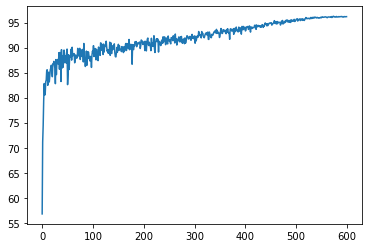

In [33]:
pcdarts_train = get_valid_acc('./PC-DARTS/begin/log.txt')
plt.plot(pcdarts_train, label='pcdarts')
max(pcdarts_train)

In [34]:
geno_file = 'PDARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PDARTS',
  {'skip_connect': 2,
   'dil_conv_3x3': 3,
   'sep_conv_3x3': 5,
   'dil_conv_5x5': 3,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 1,
   'max_pool_3x3': 1}),
 ('begin_unroll',
  {'sep_conv_3x3': 7,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 3,
   'skip_connect': 2,
   'avg_pool_3x3': 1,
   'sep_conv_5x5': 2})]

In [35]:
geno_file = 'PC-DARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PC_DARTS_cifar',
  {'sep_conv_3x3': 7,
   'skip_connect': 1,
   'dil_conv_3x3': 2,
   'sep_conv_5x5': 4,
   'avg_pool_3x3': 1,
   'max_pool_3x3': 1}),
 ('PC_DARTS_image',
  {'skip_connect': 3,
   'sep_conv_3x3': 9,
   'dil_conv_5x5': 2,
   'max_pool_3x3': 1,
   'sep_conv_5x5': 1}),
 ('begin_unroll',
  {'skip_connect': 3,
   'sep_conv_3x3': 7,
   'max_pool_3x3': 2,
   'dil_conv_5x5': 2,
   'sep_conv_5x5': 2})]

In [6]:
geno_file = "/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_original/log.txt"
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('2020-10-30 13:36:11,678 genotype',
  {'max_pool_3x3': 2,
   'dil_conv_3x3': 4,
   'avg_pool_3x3': 5,
   'sep_conv_3x3': 2,
   'sep_conv_5x5': 1,
   'skip_connect': 1,
   'dil_conv_5x5': 1}),
 ('2020-10-30 14:00:23,310 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:25:14,115 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:49:29,349 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:14:36,230 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:39:34,589 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:04:23,599 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:29:08,769 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:54:01,333 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('202

In [56]:
def plot_epoch_geno(geno_file, title=''):
    geno = open(geno_file, 'r')

    genotypes = []
    for line in geno.readlines():
        match = re.findall('.* = Genotype\(normal=.*\)', line)
        if match:
            arch = match[0].split(' = ')
            arch_name, arch_type = arch[0], arch[1]
            arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
            arch_type = {e:arch_type.count(e) for e in arch_type}
            genotypes.append((arch_name, arch_type))
            
    data = []
    for t, d in genotypes:
        data.append(d)

    df = pd.DataFrame(data=data)
    df = df.fillna(0)

    plt.figure(figsize=(10,4))
    plt.plot(df)
    plt.legend(df.columns)
    plt.ylabel('number of connection type')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

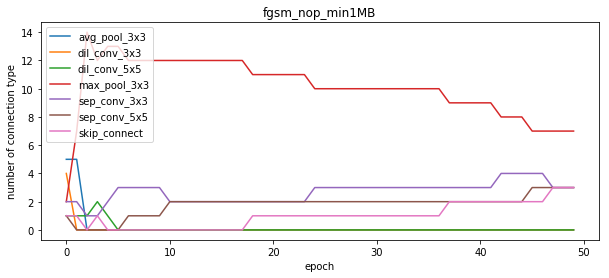

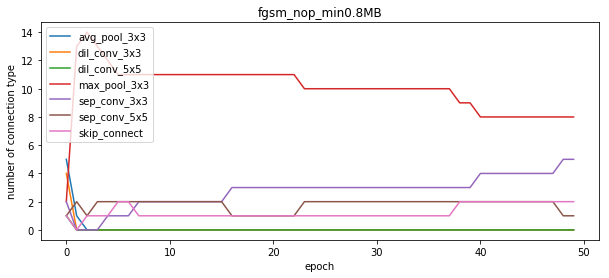

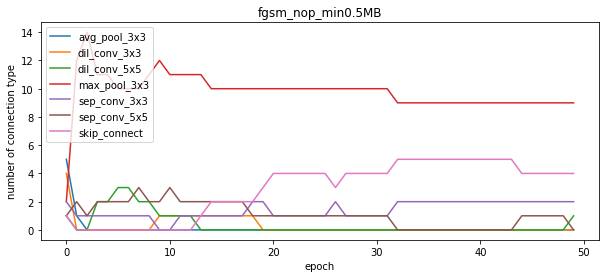

In [57]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min/log.txt", 'fgsm_nop_min1MB')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min8e5/log.txt", 'fgsm_nop_min0.8MB')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min5e5/log.txt", 'fgsm_nop_min0.5MB')

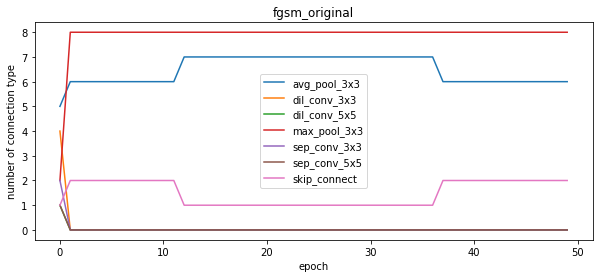

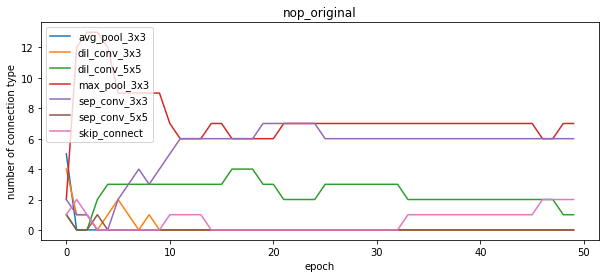

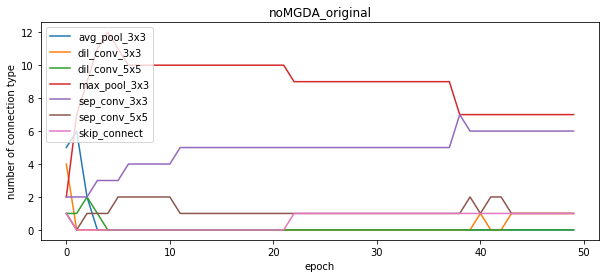

In [58]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_original/log.txt", 'fgsm_original')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/nop_original/log.txt", 'nop_original')

plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/noMGDA_original/log.txt", 'noMGDA_original')

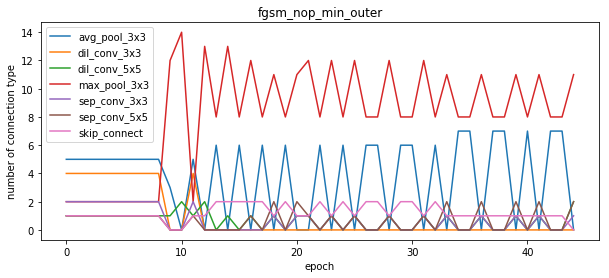

In [64]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min_outer/log.txt", 'fgsm_nop_min_outer')

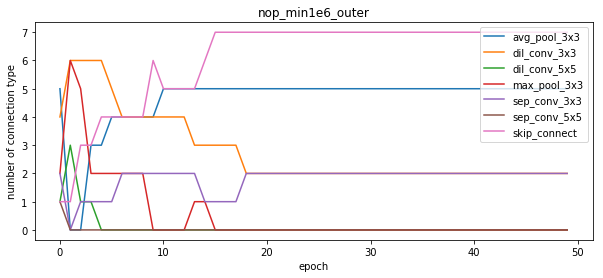

In [69]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/nop_min1e6_outer/log.txt", 'nop_min1e6_outer')

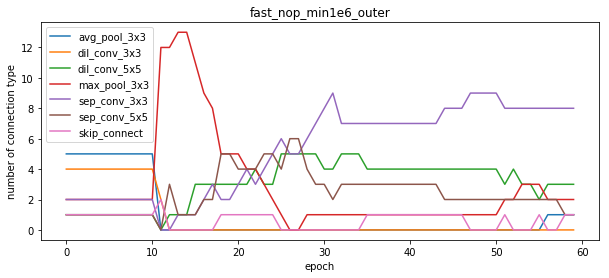

In [72]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/fast_nop_min1e6_outer/log.txt", 'fast_nop_min1e6_outer')

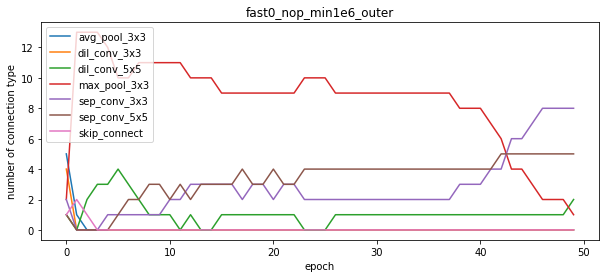

In [73]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/fast0_nop_min1e6_outer/log.txt", 'fast0_nop_min1e6_outer')

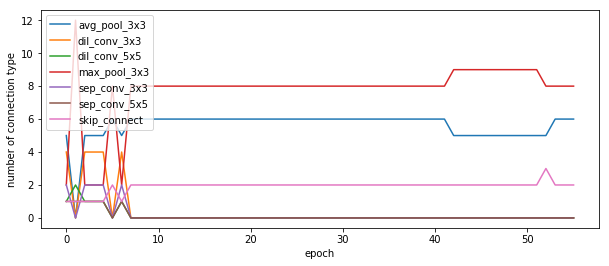

In [75]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/fast_nopL1e6U15e5_advouter/log.txt")

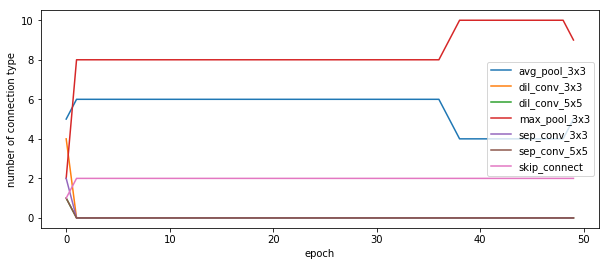

In [76]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/fast0_nopL1e6U15e5_advouter/log.txt")

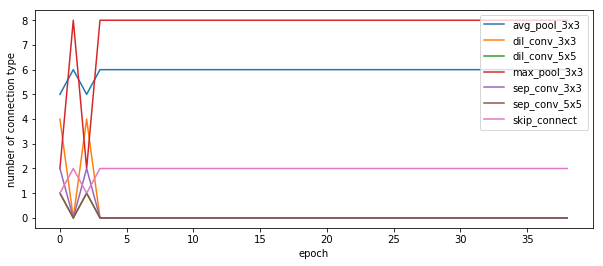

In [77]:
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS/fast0_nopPlusL1e6U15e5_advouter/log.txt")

In [83]:
search_log = "/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min10e5/log.txt"
search_log = open(search_log, 'r')

genotypes = []
for line in search_log.readlines():
    match = re.findall('loss_data = \[.*\]', line)
    if match:
        loss_data = match[0].split(' = ')[1]
        print(loss_data)

[2.2401314, 1.0]
[2.4410393, 1.0]
[2.1867864, 1.0]
[2.1995108127593994, 1.0]
[2.378784656524658, 1.0]
[2.1948328018188477, 1.0]
[2.406892776489258, 1.0]
[2.587751626968384, 1.0]
[2.465778350830078, 1.0]
[2.251492738723755, 1.0]
[2.3720390796661377, 1.0]
[2.347543954849243, 1.0]
[2.15539813041687, 1.0]
[2.358593702316284, 1.0]
[2.2567970752716064, 1.0]
[2.1382036209106445, 1.0]
[2.182739019393921, 1.0]
[1.989945650100708, 1.0]
[2.0457067489624023, 1.0]
[2.0341458320617676, 1.0]
[2.203850746154785, 1.0]
[2.372260808944702, 1.0]
[2.4486255645751953, 1.0]
[2.121420383453369, 1.0]
[2.123430013656616, 1.0]
[2.1962356567382812, 1.0]
[2.2083678245544434, 1.0]
[2.250690221786499, 1.0]
[2.2741646766662598, 1.0]
[2.0355136394500732, 1.0]
[1.9609544277191162, 1.0]
[2.0817644596099854, 1.0]
[2.40328049659729, 1.0]
[2.2439377307891846, 1.0]
[2.013369083404541, 1.0]
[1.9491699934005737, 1.0]
[2.1147913932800293, 1.0]
[2.1950111389160156, 1.0]
[2.168701171875, 1.0]
[2.033108949661255, 1.0]
[2.12044429

[1.0040638446807861, 1.0]
[0.9223489165306091, 1.0]
[0.838705837726593, 1.0]
[1.1261210441589355, 1.0]
[0.8874039053916931, 1.0]
[0.8024274110794067, 1.0]
[0.9070994257926941, 1.0]
[0.9663425087928772, 1.0]
[0.8205799460411072, 1.0]
[1.0199635028839111, 1.0]
[1.0186855792999268, 1.0]
[0.9127799868583679, 1.0]
[0.9743896126747131, 1.0]
[1.2762720584869385, 1.0]
[0.9154635667800903, 1.0]
[1.0165269374847412, 1.0]
[0.9835640788078308, 1.0]
[0.8841155767440796, 1.0]
[0.9043900370597839, 1.0]
[0.9409362077713013, 1.0]
[0.8694394826889038, 1.0]
[0.9881199598312378, 1.0]
[1.031428337097168, 1.0]
[1.0221281051635742, 1.0]
[0.8579450845718384, 1.0]
[0.9539238214492798, 1.0]
[0.7568098306655884, 1.0]
[0.9256075024604797, 1.0]
[0.9142351150512695, 1.0]
[1.0252865552902222, 1.0]
[0.8890946507453918, 1.0]
[1.1465692520141602, 1.0]
[0.9240838289260864, 1.0]
[0.8769938945770264, 1.0]
[0.8103851675987244, 1.0]
[0.8222786784172058, 1.0]
[0.9095489382743835, 1.0]
[1.1947827339172363, 1.0]
[1.02494311332

[0.7423040270805359, 1.0]
[0.8602662682533264, 1.0]
[0.9476808309555054, 1.0]
[0.8482757210731506, 1.0]
[0.716607391834259, 1.0]
[0.9366428852081299, 1.0]
[0.9141724705696106, 1.0]
[0.5950099229812622, 1.0]
[0.6627124547958374, 1.0]
[0.6680530905723572, 1.0]
[0.7002410888671875, 1.0]
[0.9829264879226685, 1.0]
[0.7165744304656982, 1.0]
[0.8188607096672058, 1.0]
[1.0516417026519775, 1.0]
[0.7270630598068237, 1.0]
[0.6709660291671753, 1.0]
[0.6087770462036133, 1.0]
[0.7511672377586365, 1.0]
[0.8778090476989746, 1.0]
[0.7007821798324585, 1.0]
[0.9463566541671753, 1.0]
[0.9993764758110046, 1.0]
[0.818309485912323, 1.0]
[0.8513370752334595, 1.0]
[0.9381915330886841, 1.0]
[0.8905799984931946, 1.0]
[0.8111741542816162, 1.0]
[0.9966952800750732, 1.0]
[0.717302680015564, 1.0]
[0.695419192314148, 1.0]
[0.8817579746246338, 1.0]
[1.0740894079208374, 1.0]
[0.9131245613098145, 1.0]
[1.017564296722412, 1.0]
[0.6629940271377563, 1.0]
[0.9204227924346924, 1.0]
[0.7408572435379028, 1.0]
[0.61713057756423

[0.8480744957923889, 1.0]
[0.6867467164993286, 1.0]
[0.9518285989761353, 1.0]
[0.7656272053718567, 1.0]
[1.1303801536560059, 1.0]
[0.7206501960754395, 1.0]
[0.6245259046554565, 1.0]
[0.8107537031173706, 1.0]
[0.5454447269439697, 1.0]
[0.6602236032485962, 1.0]
[0.8495922088623047, 1.0]
[0.7064555883407593, 1.0]
[0.7045778632164001, 1.0]
[0.7957281470298767, 1.0]
[0.6912047863006592, 1.0]
[0.680353045463562, 1.0]
[0.7147156596183777, 1.0]
[0.684033989906311, 1.0]
[0.8093047142028809, 1.0]
[0.9379112720489502, 1.0]
[0.9485610127449036, 1.0]
[0.5756306052207947, 1.0]
[0.7268216609954834, 1.0]
[0.5802052021026611, 1.0]
[0.8882933855056763, 1.0]
[0.6286587119102478, 1.0]
[0.8534306883811951, 1.0]
[0.612799346446991, 1.0]
[0.7965366244316101, 1.0]
[0.6760426163673401, 1.0]
[0.6441812515258789, 1.0]
[0.8457604050636292, 1.0]
[0.750465452671051, 1.0]
[0.7647436261177063, 1.0]
[0.5945667624473572, 1.0]
[0.6161587834358215, 1.0]
[0.6859089732170105, 1.0]
[0.8618703484535217, 1.0]
[0.6850117444992

[0.7030637860298157, 1.0]
[0.5496113896369934, 1.0]
[0.5872989296913147, 1.0]
[0.7054333686828613, 1.0]
[0.46093130111694336, 1.0]
[0.5878509879112244, 1.0]
[0.6063910722732544, 1.0]
[0.953717052936554, 1.0]
[0.6188825964927673, 1.0]
[0.3841071128845215, 1.0]
[0.7532297968864441, 1.0]
[0.595820963382721, 1.0]
[0.511670708656311, 1.0]
[0.830039918422699, 1.0]
[0.5244057178497314, 1.0]
[0.7566019296646118, 1.0]
[0.6657118797302246, 1.0]
[0.38135915994644165, 1.0]
[0.4686146676540375, 1.0]
[0.6294776797294617, 1.0]
[0.7167317867279053, 1.0]
[0.5605420470237732, 1.0]
[0.6120777130126953, 1.0]
[0.5092504620552063, 1.0]
[0.5331354737281799, 1.0]
[0.6149073243141174, 1.0]
[0.7782096862792969, 1.0]
[0.5830554366111755, 1.0]
[0.5947185158729553, 1.0]
[0.728042721748352, 1.0]
[0.5902378559112549, 1.0]
[0.7181794047355652, 1.0]
[0.5235575437545776, 1.0]
[0.7452459335327148, 1.0]
[0.5953308343887329, 1.0]
[0.5380172729492188, 1.0]
[0.4562075436115265, 1.0]
[0.7947313189506531, 1.0]
[0.650243461132